<a href="https://colab.research.google.com/github/appersaravanan/public_images/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from collections import defaultdict
import math
import networkx as nx
import random
from tqdm import tqdm
from zipfile import ZipFile
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import gzip as gzip_lib
import numpy as np
import os
import pprint
import shutil
import tempfile
import urllib
import uuid

In [2]:
!git clone https://github.com/appersaravanan/public_images.git

Cloning into 'public_images'...
remote: Enumerating objects: 2608, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 2608 (delta 16), reused 40 (delta 11), pack-reused 2556
Receiving objects: 100% (2608/2608), 284.32 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (5051/5051), done.


In [44]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-03 12:54:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-03 12:54:40 (72.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
!mv  /content/public_images/interim/ /content/sample_data/bills_file/

In [65]:
#movies = pd.read_csv("/content/public_images/interim/000.csv",on_bad_lines='skip')
base_path="/content/sample_data/bills_file/"
filenames= os.listdir(base_path)
len(filenames)

626

In [110]:
len(filenames)
labels=[]
sentences=[]
bb=[]
train_sentences=[]
train_bb=[]
train_labels=[]
test_sentences=[];
test_bb=[]
test_labels=[];
valid_sentences=[];
valid_bb=[];
valid_labels=[];
def get_train_test_data():
 
 
 
  for filename in filenames :
    if int(filename.split(".")[0]) >550:  
      sentences= valid_sentences;  
      labels=valid_labels;
      bb=valid_bb
      
    elif int(filename.split(".")[0]) > 100: 
      sentences= train_sentences;   
      labels=train_labels;
      bb=train_bb
    else:
      sentences=test_sentences;
      labels=test_labels;
      bb=test_bb;
    
    path="{}{}".format(base_path,filename)
    df=pd.read_csv(path,on_bad_lines='skip')
    for i in range(len(df)):   
      sentences.append(df.iloc[i, 8])
      bb.append([df.iloc[i,0:8]])
      label=df.iloc[i, 9]
      if pd.isna(label):
        labels.append(0)
      elif label=="company":
        labels.append(0)
      elif label=="address":
        labels.append(1)
      elif label=="invoice":
        labels.append(2)
      elif label=="date":
        labels.append(3)
      elif label=="total " or  label=="total":
        labels.append(4 )
      else:
        print(label)
      




In [111]:
get_train_test_data()
lastIndex=2
(train_sentences[:lastIndex], train_labels[:lastIndex],train_bb[:lastIndex]),
(test_sentences[:lastIndex], test_labels[:lastIndex], test_bb[:lastIndex]),
(valid_sentences[:lastIndex],valid_labels[:lastIndex],valid_bb[:lastIndex])

(['POPULAR BOOK',
  'CO. (M) SDN BHD',
  '(CO. NO. 113825-W)',
  '(GST REG NO. 001492992000)',
  'NO 8, JALAN 7/118B, DESA TUN RAZAK'],
 [0, 0, 0, 1, 1],
 [[0    189
   1    280
   2    710
   3    280
   4    710
   5    322
   6    189
   7    322
   Name: 0, dtype: object],
  [0    139
   1    330
   2    806
   3    330
   4    806
   5    372
   6    139
   7    372
   Name: 1, dtype: object],
  [0    256
   1    381
   2    649
   3    381
   4    649
   5    424
   6    256
   7    424
   Name: 2, dtype: object],
  [0    165
   1    433
   2    735
   3    433
   4    735
   5    478
   6    165
   7    478
   Name: 3, dtype: object],
  [0     71
   1    482
   2    827
   3    482
   4    827
   5    520
   6     71
   7    520
   Name: 4, dtype: object]])

In [109]:
train_bb[1]

0     64
1    381
2    749
3    381
4    749
5    427
6     64
7    427
Name: 1, dtype: object

In [16]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

2.1665372944746313

In [17]:
output_seq_len = int(np.percentile(sent_lens, 98))
output_seq_len

7

In [18]:
len(sentences)

0

In [112]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=100000, # number of words in vocabulary
                                    output_sequence_length=20) 

In [113]:
text_vectorizer.adapt(train_sentences)

In [114]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
POSTED

Length of text: 1

Vectorized text:
[[467   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


In [115]:
text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(text_vocab)}"), 
print(f"Most common words in the vocabulary: {text_vocab[:5]}")
print(f"Least common words in the vocabulary: {text_vocab[-5:]}")

Number of words in vocabulary: 8296
Most common words in the vocabulary: ['', '[UNK]', 'gst', 'total', '1']
Least common words in the vocabulary: ['000000381000', '000000118927', '0000000111000395667', '0000000109000712950', '000000']


In [116]:
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 100000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 20,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 8296}

In [ ]:
token_embed = layers.Embedding(input_dim=len(text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

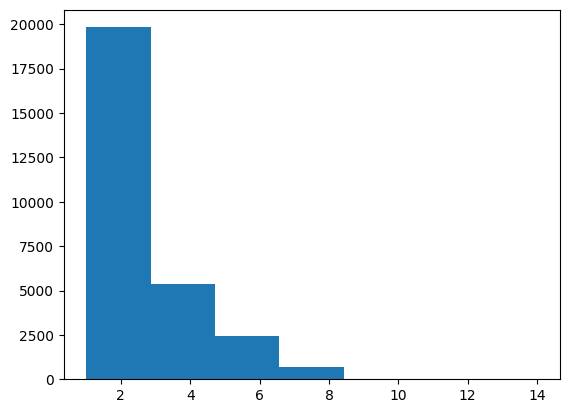

In [118]:

# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
tr_labels = np.array(train_labels)
tr_labels= np.reshape(tr_labels, (-1,1))
train_labels_one_hot = one_hot_encoder.fit_transform(tr_labels)
ts_labels = np.array(test_labels)
ts_labels= np.reshape(ts_labels, (-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(ts_labels)
vd_labels = np.array(valid_labels)
vd_labels= np.reshape(vd_labels, (-1,1))
valid_labels_one_hot = one_hot_encoder.fit_transform(vd_labels)

train_labels_one_hot[:5],test_labels_one_hot[:5],valid_labels_one_hot[:5]

In [120]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_sentences, valid_labels_one_hot))
# for data, label in train_dataset.take(1):
#   print(data,label)
train_dataset,test_dataset

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>)

In [121]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset,test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [122]:
len(valid_dataset)

116

In [125]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [126]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=15,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/15
77/77 [==============================] - 4s 37ms/step - loss: 0.4929 - accuracy: 0.8839 - val_loss: 0.4940 - val_accuracy: 0.8608
Epoch 2/15
77/77 [==============================] - 2s 22ms/step - loss: 0.3176 - accuracy: 0.9217 - val_loss: 0.3912 - val_accuracy: 0.9006
Epoch 3/15
77/77 [==============================] - 2s 20ms/step - loss: 0.2409 - accuracy: 0.9395 - val_loss: 0.3614 - val_accuracy: 0.9091
Epoch 4/15
77/77 [==============================] - 2s 30ms/step - loss: 0.2336 - accuracy: 0.9330 - val_loss: 0.3429 - val_accuracy: 0.9148
Epoch 5/15
77/77 [==============================] - 2s 21ms/step - loss: 0.1999 - accuracy: 0.9403 - val_loss: 0.3434 - val_accuracy: 0.9148
Epoch 6/15
77/77 [==============================] - 2s 21ms/step - loss: 0.2131 - accuracy: 0.9424 - val_loss: 0.3441 - val_accuracy: 0.9148
Epoch 7/15
77/77 [==============================] - 2s 31ms/step - loss: 0.2104 - accuracy: 0.9440 - val_loss: 0.3673 - val_accuracy: 0.9148
Epoch 8/15
77

77/77 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.3219 - val_accuracy: 0.9176


In [97]:
model_1.evaluate(test_dataset)

332/332 [==============================] - 2s 5ms/step - loss: 0.2048 - accuracy: 0.9482


[0.20480220019817352, 0.9481523633003235]

In [98]:
model_1_pred_probs = model_1.predict(test_dataset)


332/332 [==============================] - 2s 5ms/step


In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_encoded[:10]

array([0, 1, 0, 2, 3, 0, 0, 0, 0, 0])

In [100]:
model_1_pred_probs[:5],test_labels[:5]

(array([[9.98371005e-01, 1.74056295e-05, 2.53395498e-04, 1.44076839e-04,
         1.21410447e-03],
        [1.19510808e-11, 9.99645710e-01, 1.82696080e-04, 1.70954052e-04,
         6.46212357e-07],
        [9.97879446e-01, 2.33597239e-05, 2.35624888e-04, 1.79295675e-04,
         1.68229954e-03],
        [1.62378892e-01, 4.76179644e-03, 7.66274810e-01, 3.47464606e-02,
         3.18379775e-02],
        [2.82237045e-02, 7.34520927e-02, 1.21406905e-01, 6.86719596e-01,
         9.01976898e-02]], dtype=float32),
 [0, 1, 0, 2, 3])

In [101]:
model_1_pred=tf.argmax(model_1_pred_probs, axis=1)


In [102]:
from helper_functions import precision_recall_fscore_support
model_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_1_pred)
# model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true=test_labels_one_hot, y_pred=model_1_pred, average="weighted")

model_results

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 94.81523378582202,
 'precision': 0.9264524329460301,
 'recall': 0.9481523378582202,
 'f1': 0.9351652302457854}